## Python Code for Visualization 1 - Daily Shelter & Overnight Service Occupancy

### Getting Data

I've chosen the Daily Shelter Overnight Service Occupancy and Capacity data. Retrieved from https://open.toronto.ca/dataset/daily-shelter-overnight-service-occupancy-capacity/


### Getting Started

#### 0. Loading Python packages

In [35]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Display all columns
pd.set_option("display.max_columns", None)

# Connecting to my personal Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1. Load Data as DataFrame

In [36]:
shelter_capacity = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_viz/daily_shelter_occupancy_2023.csv')

#### 2. Profile the DataFrame

In [37]:
# Dataset columns
shelter_capacity.columns

Index(['_id', 'OCCUPANCY_DATE', 'ORGANIZATION_ID', 'ORGANIZATION_NAME',
       'SHELTER_ID', 'SHELTER_GROUP', 'LOCATION_ID', 'LOCATION_NAME',
       'LOCATION_ADDRESS', 'LOCATION_POSTAL_CODE', 'LOCATION_CITY',
       'LOCATION_PROVINCE', 'PROGRAM_ID', 'PROGRAM_NAME', 'SECTOR',
       'PROGRAM_MODEL', 'OVERNIGHT_SERVICE_TYPE', 'PROGRAM_AREA',
       'SERVICE_USER_COUNT', 'CAPACITY_TYPE', 'CAPACITY_ACTUAL_BED',
       'CAPACITY_FUNDING_BED', 'OCCUPIED_BEDS', 'UNOCCUPIED_BEDS',
       'UNAVAILABLE_BEDS', 'CAPACITY_ACTUAL_ROOM', 'CAPACITY_FUNDING_ROOM',
       'OCCUPIED_ROOMS', 'UNOCCUPIED_ROOMS', 'UNAVAILABLE_ROOMS',
       'OCCUPANCY_RATE_BEDS', 'OCCUPANCY_RATE_ROOMS'],
      dtype='object')

In [38]:
# Dtypes for extra info
shelter_capacity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46899 entries, 0 to 46898
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   _id                     46899 non-null  int64  
 1   OCCUPANCY_DATE          46899 non-null  object 
 2   ORGANIZATION_ID         46899 non-null  int64  
 3   ORGANIZATION_NAME       46899 non-null  object 
 4   SHELTER_ID              46899 non-null  int64  
 5   SHELTER_GROUP           46899 non-null  object 
 6   LOCATION_ID             46889 non-null  float64
 7   LOCATION_NAME           46534 non-null  object 
 8   LOCATION_ADDRESS        45490 non-null  object 
 9   LOCATION_POSTAL_CODE    45490 non-null  object 
 10  LOCATION_CITY           45476 non-null  object 
 11  LOCATION_PROVINCE       45476 non-null  object 
 12  PROGRAM_ID              46899 non-null  int64  
 13  PROGRAM_NAME            46899 non-null  object 
 14  SECTOR                  46899 non-null

In [39]:
# Converting occupancy_date to date type in case we use it in our visualization
shelter_capacity['OCCUPANCY_DATE'] = pd.to_datetime(shelter_capacity['OCCUPANCY_DATE'])
shelter_capacity['OCCUPANCY_DATE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 46899 entries, 0 to 46898
Series name: OCCUPANCY_DATE
Non-Null Count  Dtype         
--------------  -----         
46899 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 366.5 KB


### Plotting the data

In [41]:
# Using head() to remember our data
shelter_capacity.head(2)

,_id,OCCUPANCY_DATE,ORGANIZATION_ID,ORGANIZATION_NAME,SHELTER_ID,SHELTER_GROUP,LOCATION_ID,LOCATION_NAME,LOCATION_ADDRESS,LOCATION_POSTAL_CODE,LOCATION_CITY,LOCATION_PROVINCE,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,CAPACITY_FUNDING_BED,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,CAPACITY_ACTUAL_ROOM,CAPACITY_FUNDING_ROOM,OCCUPIED_ROOMS,UNOCCUPIED_ROOMS,UNAVAILABLE_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS,MONTH
0,1,2023-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320.0,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,Toronto,ON,16892,COSTI - Hotel Program - Dixon (Refugee Families),Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,614,Room Based Capacity,NaN,NaN,NaN,NaN,NaN,148.0,150.0,148.0,0.0,2.0,NaN,100.0,1
1,2,2023-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320.0,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,Toronto,ON,16891,COSTI - Hotel Program - Dixon (Refugee Singles),Mixed Adult,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,111,Room Based Capacity,NaN,NaN,NaN,NaN,NaN,56.0,56.0,56.0,0.0,0.0,NaN,100.0,1


<Axes: xlabel='OCCUPANCY_DATE', ylabel='OCCUPANCY_RATE_BEDS'>

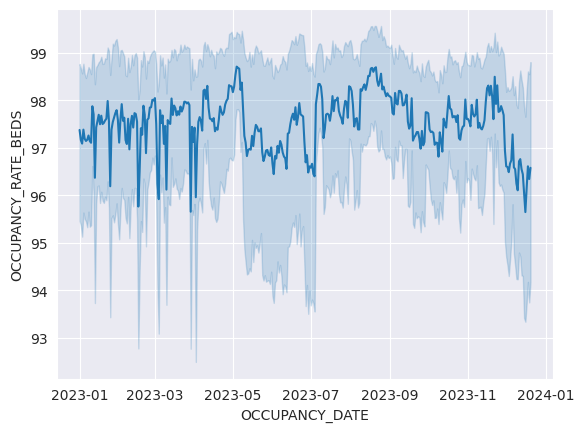

In [44]:
# First try at plotting our data

# Using the darkgrid style
sns.set_style('darkgrid')

# Plotting occupancy date and rate
sns.lineplot(data=shelter_capacity,
             x='OCCUPANCY_DATE',
             y='OCCUPANCY_RATE_BEDS')

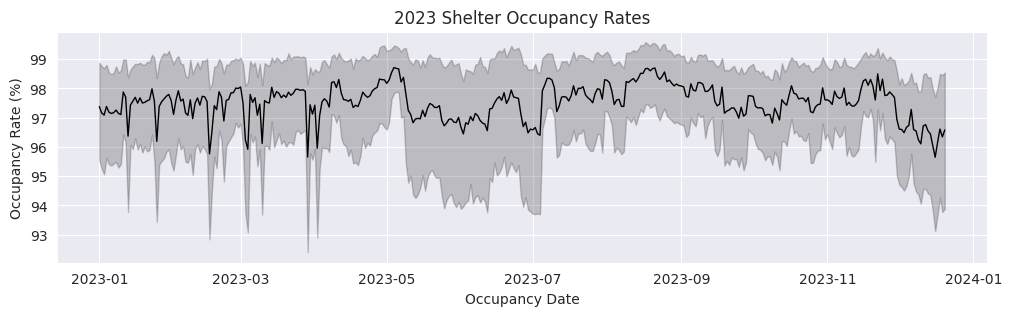

In [46]:
# Second try at plotting the shelter data

# Making the figure longer to better display the dates
fig = plt.subplots(figsize=(12,3))

# Specifying the axes and line styles
sheltergraph = sns.lineplot(data=shelter_capacity,
                        x='OCCUPANCY_DATE',
                        y='OCCUPANCY_RATE_BEDS',
                        color = 'black',
                        linestyle = '-',
                        linewidth = 1)

# Specifying title and data labels
sheltergraph.set(title = '2023 Shelter Occupancy Rates',
             xlabel = 'Occupancy Date',
             ylabel = 'Occupancy Rate (%)')

# Show visualization without text
plt.show()